**Análise de dados da Netflix**


In [63]:
#importar dados csv Netflix

import pandas as pd
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


**Número de filas presentes no dataframe**

In [64]:
#ver quantas filas tem todo o documento

print(len(df))

7787


**Colunas presentes no dataframe**

In [65]:
#ver quais colunas temos 

print(list(df.columns))

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


**Análise dos diferentes tipos de objetos presentes no dataframe**

In [66]:
#ver o tipo de objetos que temos em cada coluna

df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

**Análise dos dados em falta em cada coluna**

In [67]:
#ver os dados que faltam em todas as colunas

missing_values_count = df.isnull().sum()
missing_values_count[0:12]

#estão em falta dados nas colunas director, cast, country, date_added, rating

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

**Análise das colunas type e release_year**

In [68]:
#observar apenas as colunas type e release_year, ou seja, do tipo de conteúdo e do ano em que foi produzido

result_1= df.loc[:,['type','release_year']]
result_1

,type,release_year
0,TV Show,2020
1,Movie,2016
2,Movie,2011
3,Movie,2009
4,Movie,2008
...,...,...
7782,Movie,2005
7783,Movie,2015
7784,Movie,2019
7785,TV Show,2019


**Análise dos dados referentes ao ano 2020**

In [69]:
# dados 2020

rslt_df = df.loc[(df['release_year'] == 2020)]

filmes_2020 = rslt_df.loc[(rslt_df['type'] == "Movie")]

series_2020 = rslt_df.loc[(rslt_df['type'] == "TV Show")]

#ver quantos filmes/ tv shows foram lançados em 2020

lançamentos_2020 = (len(rslt_df))

#ver quantos filmes foram lançados em 2020

num_filmes_2020 = (len(filmes_2020))

#ver quantos TV Shows foram lançados em 2020

num_series_2020 = (len(series_2020))

print("Em 2020 registaram-se", lançamentos_2020, "lançamentos. Entre eles", num_filmes_2020, "filmes e", num_series_2020, "TV shows.")

Em 2020 registaram-se 868 lançamentos. Entre eles 411 filmes e 457 TV shows.


**Percentagem de filmes e séries disponíveis na Netflix**

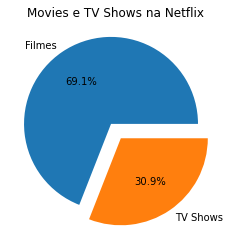

In [70]:
# gráfico de barras com a percentagem de filmes e TV Shows na Netflix

import matplotlib.pyplot as plt
%matplotlib inline

movies = df.loc[df["type"] == "Movie"].count()[0]
tvshows = df.loc[df["type"] == "TV Show"].count()[0]

# print("Movies:", movies)
# print("TV Shows:", tvshows)

labels = ["Filmes", "TV Shows"]

explode = (.1, .1)

plt.title("Movies e TV Shows na Netflix")
plt.pie([movies, tvshows], labels = labels, autopct='%1.1f%%', explode = explode)
plt.show()

**Os países que mais produzem**

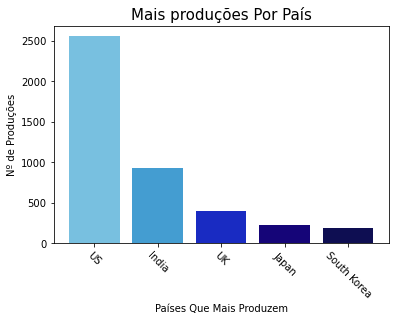

In [71]:
# gráfico de barras com os países com mais produções

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

#print(df.country.value_counts().head())

data = df.country.value_counts().head().tolist()
labels = ["US", "India", "UK", "Japan", "South Korea"]
plt.xticks(range(len(data)), labels, rotation = -45)
plt.xlabel('Países Que Mais Produzem')
plt.ylabel('Nº de Produções')
plt.title('Mais produções Por País', fontdict = { "fontsize": 15})
plt.bar(range(len(data)), data, color=['#78C0E0', '#449DD1', '#192BC2', '#150578', '#0E0E52']) 
plt.show()

**A duração média dos filmes da Netflix**

In [73]:
#duração média dos filmes

filmes = df.loc[(df['type'] == "Movie")]
filmes

filmes.duration = [int(x.strip(" min")) if type(x) == str else x for x in filmes.duration]

def fazer_media(num):
    soma = 0
    for i in num:
        soma = soma + i           

    media = soma / len(num)
    return media

print("A duração média dos filmes é de", round(fazer_media(filmes.duration.tolist())), "minutos.")

A duração média dos filmes é de 99 minutos.
